🚀 CHURN PREDICTION MODEL WITH 90-DAY DEFINITION

📂 Loading transaction data...
✅ Loaded 407664 transactions from 2009-12-01 to 2010-12-09

📅 Latest date in data: 2010-12-09
📅 Cutoff date (90 days before): 2010-09-10

✅ Customers active in last 90 days: 2877

📂 Loading RFM data...
✅ Loaded 4312 customers from RFM

📊 CHURN DEFINITION COMPARISON
New Churn (90 days)      0    1
Old Churn (180 days)           
0                     2877  610
1                        0  825

📊 Agreement between definitions: 85.85%

📊 New churn rate (90 days): 33.28%
📊 Old churn rate (180 days): 19.13%

🤖 BUILDING PREDICTION MODEL

📊 Features: ['Recency', 'Frequency', 'Monetary']
📊 Target distribution:
Churn_New
0    2877
1    1435
Name: count, dtype: int64
📊 Churn rate: 33.28%

📊 Training set size: 3234
📊 Test set size: 1078

⚡ Training KNN model...
✅ Model training complete!

📈 MODEL PERFORMANCE METRICS

🔹 ACCURACY:  0.9935 (99.35%)
🔹 PRECISION: 0.9972 (99.72%)
🔹 RECALL:    0.9833 (98.33%)

📋 DETAILED CLASS

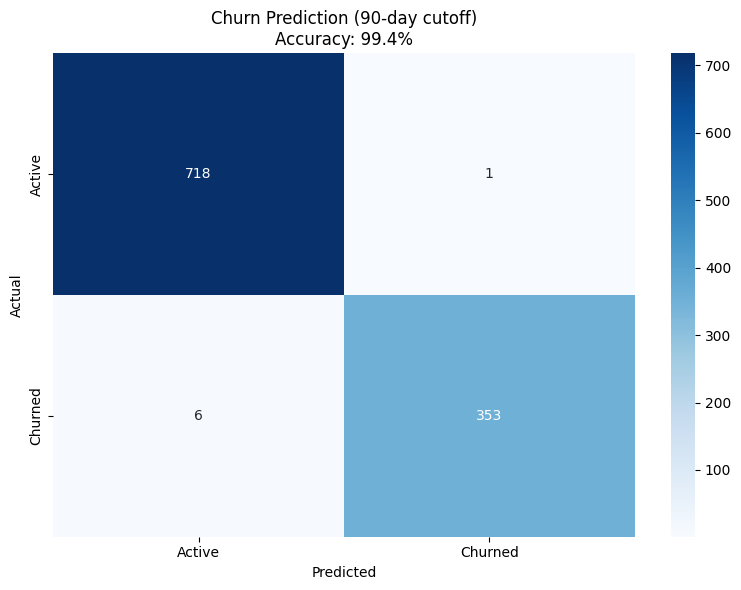

✅ Saved confusion matrix to visuals folder


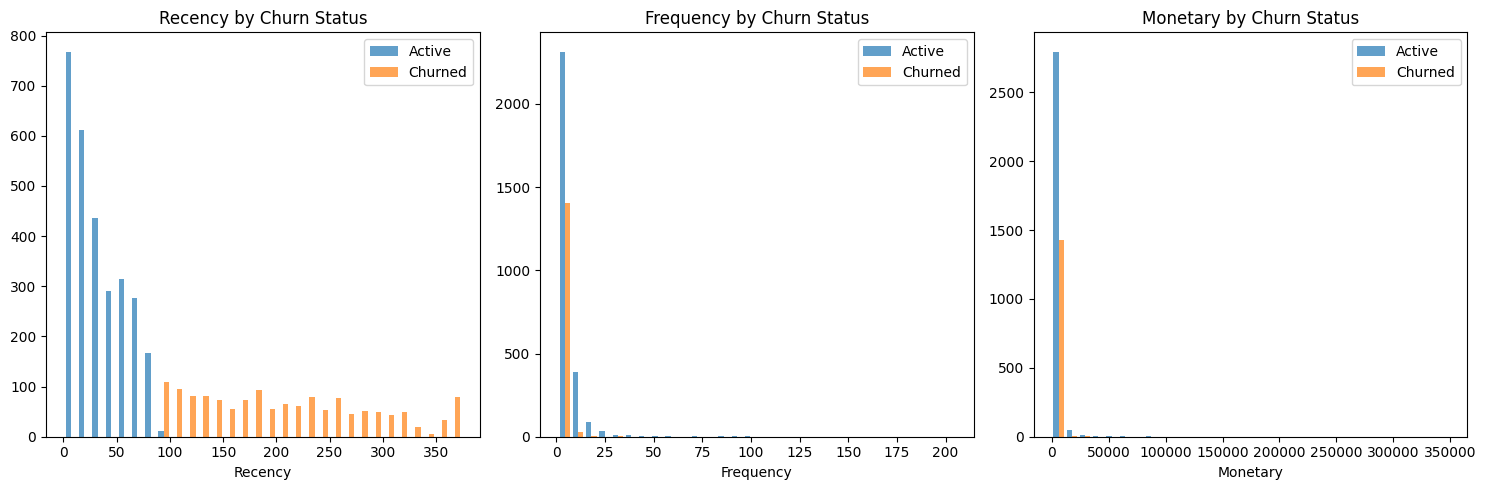

✅ Saved feature distribution plot

💾 SAVING RESULTS
✅ Saved complete RFM data to: ../data/processed/rfm_complete.csv
✅ Saved model metrics to: ../data/processed/model_metrics_90day.csv

📊 FINAL SUMMARY:
    Definition  Churned_Customers Churn_Rate
Old (180 days)                825     19.13%
 New (90 days)               1435     33.28%

🎉 DONE! Model training and evaluation complete!


In [4]:
# COMPLETE CHURN PREDICTION CODE
# Run this in your 04_churn_predict.ipynb

import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os

print("="*60)
print("🚀 CHURN PREDICTION MODEL WITH 90-DAY DEFINITION")
print("="*60)

# ============================================================
# PART 1: LOAD DATA AND CREATE NEW CHURN DEFINITION
# ============================================================

# 1. Load original transaction data (with dates)
print("\n📂 Loading transaction data...")
df = pd.read_csv("../data/processed/cleaned_retail.csv")
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
print(f"✅ Loaded {len(df)} transactions from {df['InvoiceDate'].min().date()} to {df['InvoiceDate'].max().date()}")

# 2. Find the latest date and set cutoff (90 days before end)
latest_date = df["InvoiceDate"].max()
cutoff_date = latest_date - timedelta(days=90)
print(f"\n📅 Latest date in data: {latest_date.date()}")
print(f"📅 Cutoff date (90 days before): {cutoff_date.date()}")

# 3. Find customers who purchased AFTER the cutoff date (active in last 90 days)
active_customers = df[df["InvoiceDate"] > cutoff_date]["Customer ID"].unique()
print(f"\n✅ Customers active in last 90 days: {len(active_customers)}")

# 4. Load RFM data
print("\n📂 Loading RFM data...")
rfm = pd.read_csv("../data/processed/rfm.csv")
print(f"✅ Loaded {len(rfm)} customers from RFM")

# 5. Create both churn definitions
# Old definition (180 days)
rfm['Churn_Old'] = (rfm['Recency'] > 180).astype(int)

# New definition (90 days based on date cutoff)
rfm['Churn_New'] = (~rfm['Customer ID'].isin(active_customers)).astype(int)

# 6. Compare the two definitions
print("\n" + "="*60)
print("📊 CHURN DEFINITION COMPARISON")
print("="*60)
comparison = pd.crosstab(
    rfm['Churn_Old'],
    rfm['Churn_New'],
    rownames=['Old Churn (180 days)'],
    colnames=['New Churn (90 days)']
)
print(comparison)

# Calculate agreement
agreement = (rfm['Churn_Old'] == rfm['Churn_New']).mean()
print(f"\n📊 Agreement between definitions: {agreement:.2%}")

print(f"\n📊 New churn rate (90 days): {rfm['Churn_New'].mean():.2%}")
print(f"📊 Old churn rate (180 days): {rfm['Churn_Old'].mean():.2%}")

# ============================================================
# PART 2: BUILD PREDICTION MODEL WITH NEW CHURN DEFINITION
# ============================================================

print("\n" + "="*60)
print("🤖 BUILDING PREDICTION MODEL")
print("="*60)

# 7. Prepare features and target (using NEW churn definition)
feature_cols = ["Recency", "Frequency", "Monetary"]
X = rfm[feature_cols]
y = rfm["Churn_New"]  # Using the 90-day definition

print(f"\n📊 Features: {feature_cols}")
print(f"📊 Target distribution:")
print(y.value_counts())
print(f"📊 Churn rate: {y.mean():.2%}")

# 8. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print(f"\n📊 Training set size: {len(X_train)}")
print(f"📊 Test set size: {len(X_test)}")

# 9. Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Train KNN model
print("\n⚡ Training KNN model...")
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)
print("✅ Model training complete!")

# 11. Make predictions
y_pred = knn.predict(X_test_scaled)

# ============================================================
# PART 3: EVALUATE MODEL PERFORMANCE
# ============================================================

print("\n" + "="*60)
print("📈 MODEL PERFORMANCE METRICS")
print("="*60)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"\n🔹 ACCURACY:  {accuracy:.4f} ({accuracy:.2%})")
print(f"🔹 PRECISION: {precision:.4f} ({precision:.2%})")
print(f"🔹 RECALL:    {recall:.4f} ({recall:.2%})")

# Classification report
print("\n" + "="*60)
print("📋 DETAILED CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_test, y_pred, 
                          target_names=['Active', 'Churned'],
                          digits=4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n" + "="*60)
print("🔢 CONFUSION MATRIX")
print("="*60)
print("                 Predicted")
print("                Active  Churned")
print(f"Actual Active     {cm[0,0]:5d}    {cm[0,1]:5d}")
print(f"       Churned     {cm[1,0]:5d}    {cm[1,1]:5d}")

# ============================================================
# PART 4: VISUALIZATIONS
# ============================================================

print("\n" + "="*60)
print("🎨 CREATING VISUALIZATIONS")
print("="*60)

# Create visuals folder
os.makedirs("../visuals", exist_ok=True)

# 12. Confusion Matrix Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Active', 'Churned'],
            yticklabels=['Active', 'Churned'])
plt.title(f'Churn Prediction (90-day cutoff)\nAccuracy: {accuracy:.1%}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig("../visuals/confusion_matrix_90day.png", dpi=150)
plt.show()
print("✅ Saved confusion matrix to visuals folder")

# 13. Feature Distribution by Actual Churn
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(feature_cols):
    axes[i].hist([rfm[rfm['Churn_New']==0][feature], 
                  rfm[rfm['Churn_New']==1][feature]], 
                 label=['Active', 'Churned'], alpha=0.7, bins=30)
    axes[i].set_title(f'{feature} by Churn Status')
    axes[i].set_xlabel(feature)
    axes[i].legend()

plt.tight_layout()
plt.savefig("../visuals/feature_distribution_90day.png", dpi=150)
plt.show()
print("✅ Saved feature distribution plot")

# 14. Compare predictions with clusters (if cluster exists)
if 'Cluster' in rfm.columns:
    print("\n" + "="*60)
    print("📊 CHURN BY CLUSTER (90-day definition)")
    print("="*60)
    
    # Add predictions to RFM
    rfm['Predicted_Churn'] = knn.predict(scaler.transform(X))
    
    cluster_analysis = rfm.groupby('Cluster').agg({
        'Churn_New': ['mean', 'count'],
        'Predicted_Churn': 'mean'
    }).round(3)
    
    print(cluster_analysis)
    
    # Plot
    plt.figure(figsize=(10,6))
    x = range(4)
    width = 0.35
    plt.bar([i - width/2 for i in x], rfm.groupby('Cluster')['Churn_New'].mean(), 
            width, label='Actual Churn', color='red', alpha=0.7)
    plt.bar([i + width/2 for i in x], rfm.groupby('Cluster')['Predicted_Churn'].mean(), 
            width, label='Predicted Churn', color='blue', alpha=0.7)
    plt.xlabel('Cluster')
    plt.ylabel('Churn Rate')
    plt.title('Actual vs Predicted Churn Rate by Cluster (90-day)')
    plt.xticks(x, ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'])
    plt.legend()
    plt.tight_layout()
    plt.savefig("../visuals/churn_by_cluster_90day.png", dpi=150)
    plt.show()
    print("✅ Saved cluster comparison plot")

# ============================================================
# PART 5: SAVE RESULTS
# ============================================================

print("\n" + "="*60)
print("💾 SAVING RESULTS")
print("="*60)

# Save updated RFM with new churn and predictions
rfm.to_csv("../data/processed/rfm_complete.csv", index=False)
print("✅ Saved complete RFM data to: ../data/processed/rfm_complete.csv")

# Save model metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Value': [accuracy, precision, recall]
})
metrics_df.to_csv("../data/processed/model_metrics_90day.csv", index=False)
print("✅ Saved model metrics to: ../data/processed/model_metrics_90day.csv")

# Save comparison summary
summary_df = pd.DataFrame({
    'Definition': ['Old (180 days)', 'New (90 days)'],
    'Churned_Customers': [
        rfm['Churn_Old'].sum(),
        rfm['Churn_New'].sum()
    ],
    'Churn_Rate': [
        f"{rfm['Churn_Old'].mean():.2%}",
        f"{rfm['Churn_New'].mean():.2%}"
    ]
})
print("\n📊 FINAL SUMMARY:")
print(summary_df.to_string(index=False))

print("\n" + "="*60)
print("🎉 DONE! Model training and evaluation complete!")
print("="*60)